In [ ]:
#importing OS module which for directory acccess and view
import os

# print(os.getcwd())
# os.getcwd()
# print(os.listdir('..'))
# print(os.listdir('../anacond'))

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# using python package TQDM to download dataset locally on colab
!pip install tqdm
import requests
import os
from tqdm import tqdm

In [ ]:
# function for input to tqdm
def download_dataset(file_url, name):
    r = requests.get(file_url, stream=True)

    with open(name, "wb") as file:
        for chunk in tqdm(r.iter_content(chunk_size=1024)):
             if chunk: file.write(chunk)

    print('Download complete.')

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Base path to your datasets folder
base_path = '/content/drive/MyDrive/datasets'

# Individual dataset paths
vehicles_path = os.path.join(base_path, 'Vehicles.csv')
accidents_path = os.path.join(base_path, 'Accidents.csv')
casualties_path = os.path.join(base_path, 'Casualties.csv')

print("Vehicles:", vehicles_path)
print("Accidents:", accidents_path)
print("Casualties:", casualties_path)


Mounted at /content/drive
Vehicles: /content/drive/MyDrive/datasets/Vehicles.csv
Accidents: /content/drive/MyDrive/datasets/Accidents.csv
Casualties: /content/drive/MyDrive/datasets/Casualties.csv


In [ ]:
accidents = pd.read_csv('/content/drive/MyDrive/datasets/Accidents.csv')
vehicles  = pd.read_csv('/content/drive/MyDrive/datasets/Vehicles.csv')
casualties = pd.read_csv('/content/drive/MyDrive/datasets/Casualties.csv')

# accidents=accidents.head(200000)

# vehicles=vehicles.head(200000)

# casualties=casualties.head(200000)

In [ ]:
print("accidents")
print("size=",accidents.size)
print(accidents.shape)
accidents.head()

accidents
size= 19243108
(520084, 37)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,1,1,1,0,0,1,3,2,E01004762,-1
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,4,1,1,0,0,1,3,2,E01003117,-1
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,4,1,1,0,0,1,1,2,E01000943,-1
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,4,1,1,0,0,1,1,2,E01000973,-1
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,4,1,1,0,0,1,1,2,E01000546,-1


In [ ]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 32421006
(953559, 34)


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,dir_from_e,dir_from_n,dir_to_e,dir_to_n,driver_distance_banding
0,2019010128300,2019,10128300,1,9,0,99,9,9,99,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
1,2019010128300,2019,10128300,2,9,0,99,9,9,99,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
2,2019010152270,2019,10152270,1,9,0,18,9,9,99,...,-1,3,1,E01003180,0,NaN,NaN,NaN,NaN,1
3,2019010152270,2019,10152270,2,9,0,18,9,9,99,...,-1,6,1,E01001160,0,NaN,NaN,NaN,NaN,1
4,2019010155191,2019,10155191,1,9,0,3,5,1,0,...,-1,4,1,E01031231,0,NaN,NaN,NaN,NaN,5


In [ ]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 13973568
(665408, 21)


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,...,0,0,0,0,9,1,2,E01003175,-1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,...,0,1,0,0,9,1,5,E01003411,-1,3
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,...,0,2,0,0,9,1,5,E01003413,-1,3
3,2019010152270,2019,10152270,1,1,1,2,24,5,3,...,0,0,0,0,9,1,3,E01003180,-1,1
4,2019010155191,2019,10155191,2,1,2,2,21,5,3,...,0,0,0,0,1,1,1,E01016964,-1,4


In [ ]:
accidents = accidents.join(vehicles, how='outer', lsuffix='_acc', rsuffix='_veh')
print("done joining")
print(accidents.shape)

done joining
(953559, 71)


In [ ]:
accidents.head()

,accident_index_acc,accident_year_acc,accident_reference_acc,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,dir_from_e,dir_from_n,dir_to_e,dir_to_n,driver_distance_banding
0,2019010128300,2019.0,10128300,528218.0,180407.0,-0.153842,51.508057,1.0,3.0,2.0,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
1,2019010152270,2019.0,10152270,530219.0,172463.0,-0.127949,51.436208,1.0,3.0,2.0,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
2,2019010155191,2019.0,10155191,530222.0,182543.0,-0.124193,51.526795,1.0,3.0,2.0,...,-1,3,1,E01003180,0,NaN,NaN,NaN,NaN,1
3,2019010155192,2019.0,10155192,525531.0,184605.0,-0.191044,51.546387,1.0,2.0,1.0,...,-1,6,1,E01001160,0,NaN,NaN,NaN,NaN,1
4,2019010155194,2019.0,10155194,524920.0,184004.0,-0.200064,51.541121,1.0,3.0,2.0,...,-1,4,1,E01031231,0,NaN,NaN,NaN,NaN,5


In [ ]:
# Drop rows with missing location data
# Corrected code to drop only existing columns
accidents.drop(['location_easting_osgr', 'location_northing_osgr'], axis=1, inplace=True)

# Select relevant columns for analysis
df = accidents[['accident_severity', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'day_of_week', 'speed_limit']]

# Display the first few rows of the new DataFrame
print(df.head())

   accident_severity  light_conditions  weather_conditions  \
0                3.0               1.0                 1.0   
1                3.0               4.0                 1.0   
2                3.0               4.0                 1.0   
3                2.0               4.0                 1.0   
4                3.0               4.0                 1.0   

   road_surface_conditions  day_of_week  speed_limit  
0                      1.0          2.0         30.0  
1                      1.0          3.0         30.0  
2                      1.0          3.0         30.0  
3                      1.0          3.0         20.0  
4                      1.0          3.0         30.0  


In [ ]:
import pandas as pd

# Load your dataset (update the path if needed)
accidents = pd.read_csv("/content/drive/MyDrive/datasets/Accidents.csv")

#Drop unwanted columns (only if they exist in your dataset)
drop_cols = [
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'LSOA_of_Accident_Location',
    'Junction_Control',
    '2nd_Road_Class'
]
accidents.drop(columns=[c for c in drop_cols if c in accidents.columns], inplace=True, errors='ignore')

# Combine Date and Time into Date_time (only if both exist)
if 'Date' in accidents.columns and 'Time' in accidents.columns:
    accidents['Date_time'] = accidents['Date'].astype(str) + ' ' + accidents['Time'].astype(str)
    accidents['Date_time'] = pd.to_datetime(accidents['Date_time'], errors='coerce')
    accidents.drop(['Date', 'Time'], axis=1, inplace=True, errors='ignore')

# Remove invalid (-1) values
for col in accidents.columns:
    # only apply if column is numeric or object that may contain -1
    if accidents[col].dtype != 'datetime64[ns]':
        accidents = accidents[accidents[col] != -1]

# Drop missing values
accidents.dropna(inplace=True)

# Final check
print("Cleaned dataset shape:", accidents.shape)
print("Columns:", accidents.columns.tolist())


Cleaned dataset shape: (40996, 37)
Columns: ['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'enhanced_severity_collision']


In [ ]:
# Check if Date and Time columns exist
print(accidents.columns.tolist())

['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'enhanced_severity_collision']


In [ ]:
# Combine date and time into Date_time
accidents['Date_time'] = pd.to_datetime(
    accidents['date'].astype(str) + ' ' + accidents['time'].astype(str),
    errors='coerce'
)


# **Visualization**

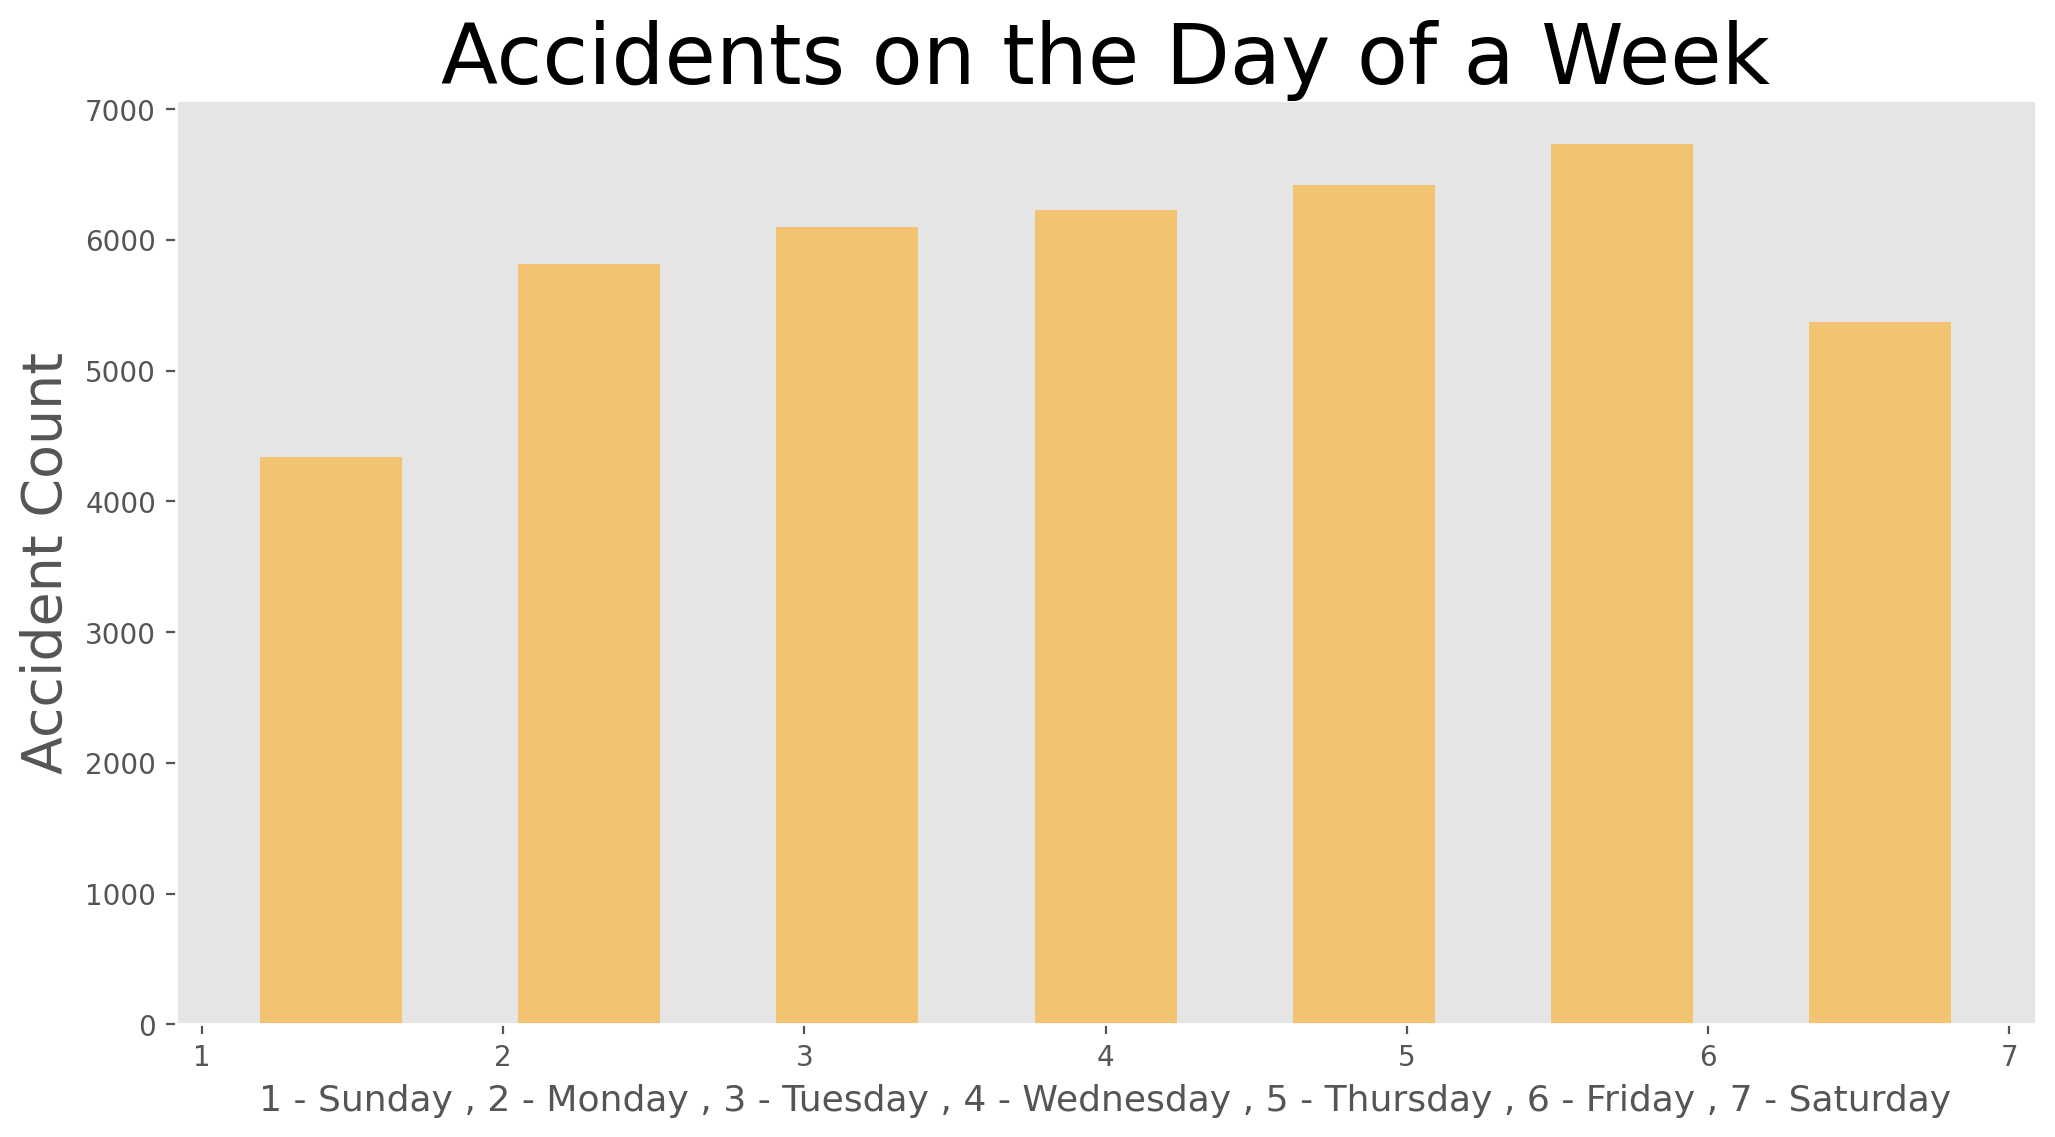

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
accidents['day_of_week'].hist(
    bins=7,
    rwidth=0.55,
    alpha=0.5,
    color='orange'
)

plt.title('Accidents on the Day of a Week', fontsize=30)
plt.grid(False)
plt.ylabel('Accident Count', fontsize=20)
plt.xlabel('1 - Sunday , 2 - Monday , 3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday', fontsize=13)
plt.show()


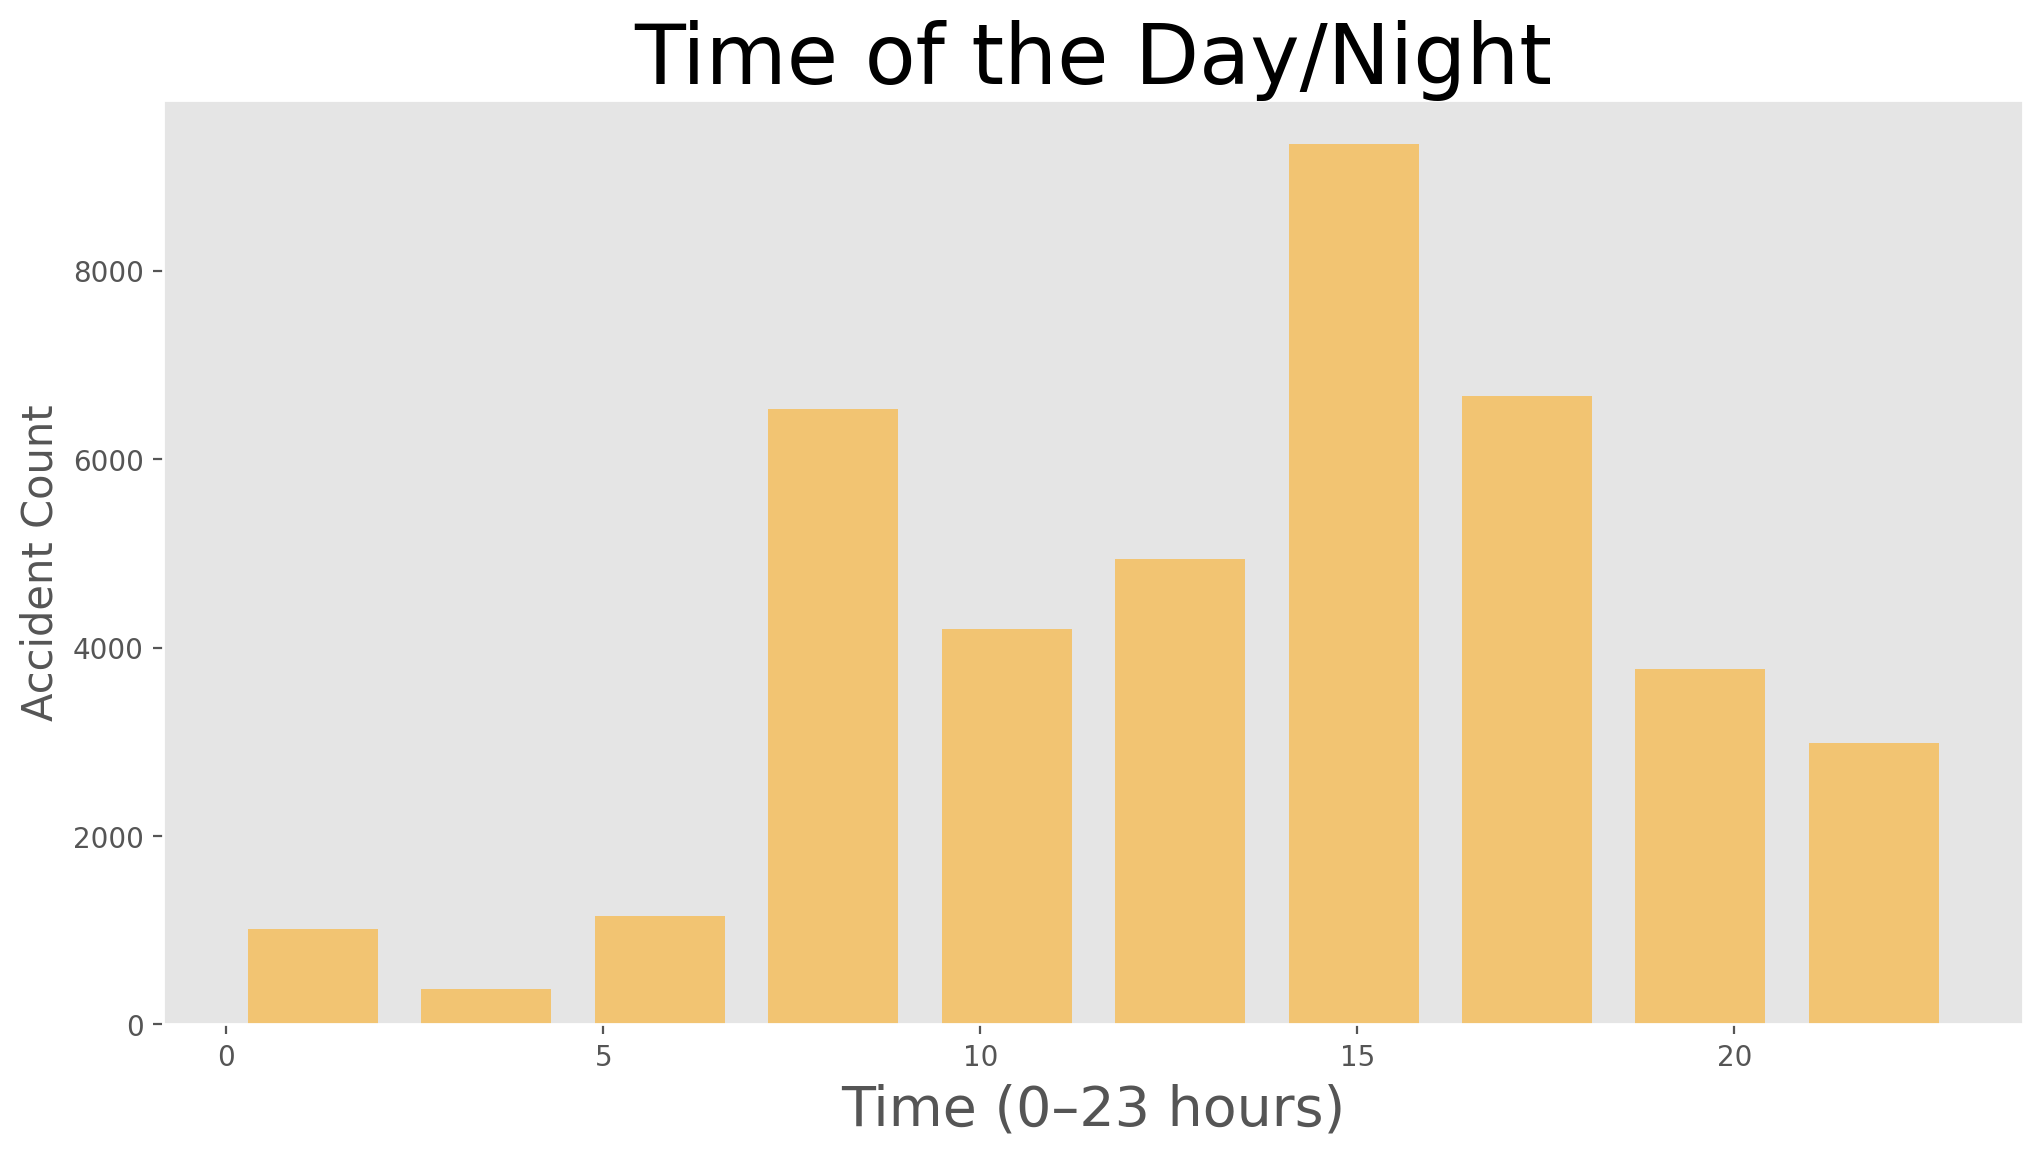

In [ ]:
import matplotlib.pyplot as plt

# Make sure Date_time column exists
if 'Date_time' not in accidents.columns:
    accidents['Date_time'] = pd.to_datetime(
        accidents['date'].astype(str) + ' ' + accidents['time'].astype(str),
        errors='coerce'
    )

plt.figure(figsize=(12,6))
accidents['Date_time'].dt.hour.hist(
    rwidth=0.75,
    alpha=0.50,
    color='orange'
)

plt.title('Time of the Day/Night', fontsize=30)
plt.grid(False)
plt.xlabel('Time (0–23 hours)', fontsize=20)
plt.ylabel('Accident Count', fontsize=15)
plt.show()


In [ ]:
casualties =pd.read_csv('/content/drive/MyDrive/datasets/Casualties.csv')
print(casualties.columns.tolist())


['accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty', 'enhanced_casualty_severity', 'casualty_distance_banding']


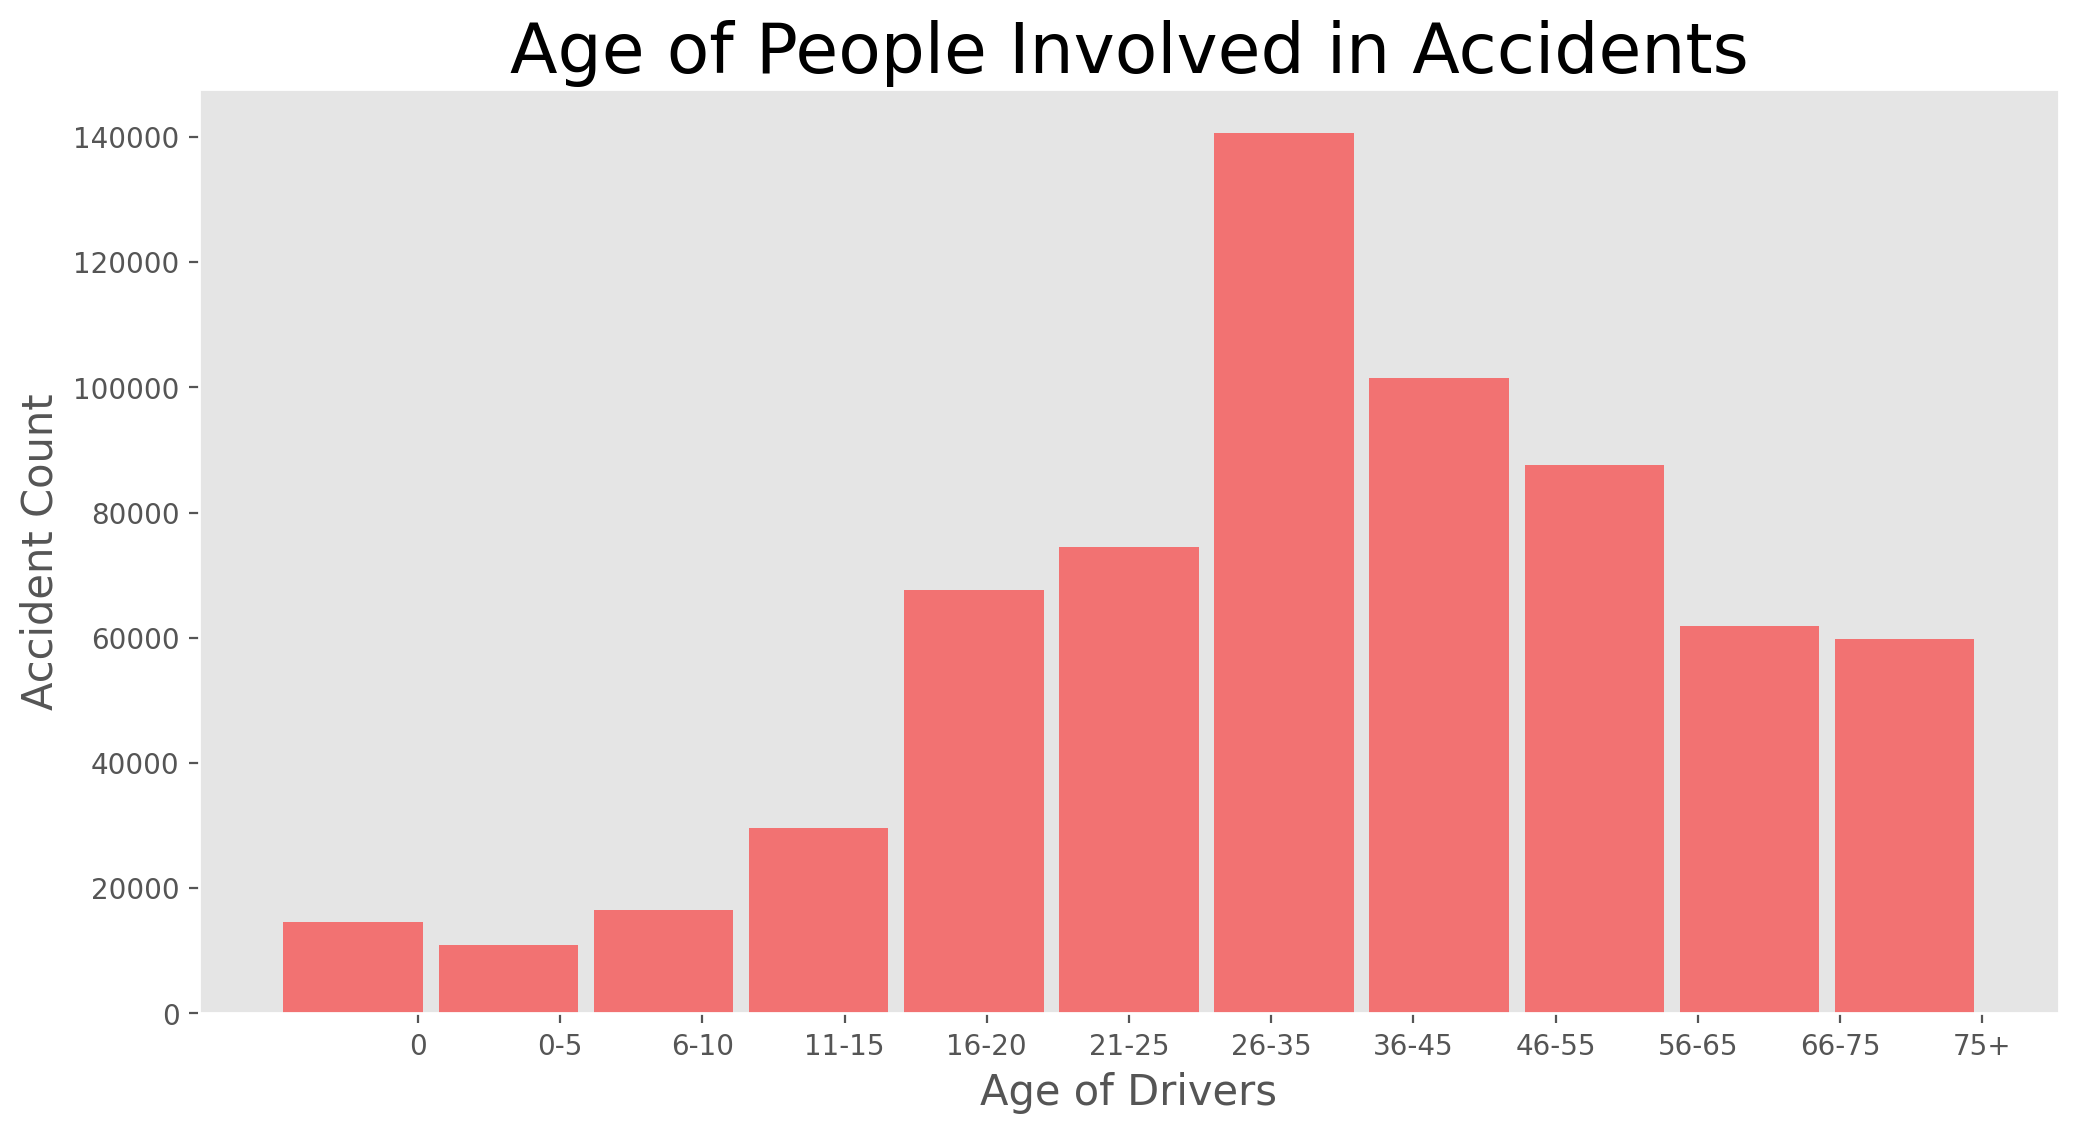

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
           '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties['age_band_of_casualty'].hist(
    bins=11,
    alpha=0.5,
    rwidth=0.90,
    color='red'
)

plt.title('Age of People Involved in Accidents', fontsize=25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident Count', fontsize=15)
plt.xlabel('Age of Drivers', fontsize=15)
plt.show()


In [ ]:
print(accidents.columns)

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location',
       'enhanced_severity_collision', 'Date_time'],
      dtype='object')


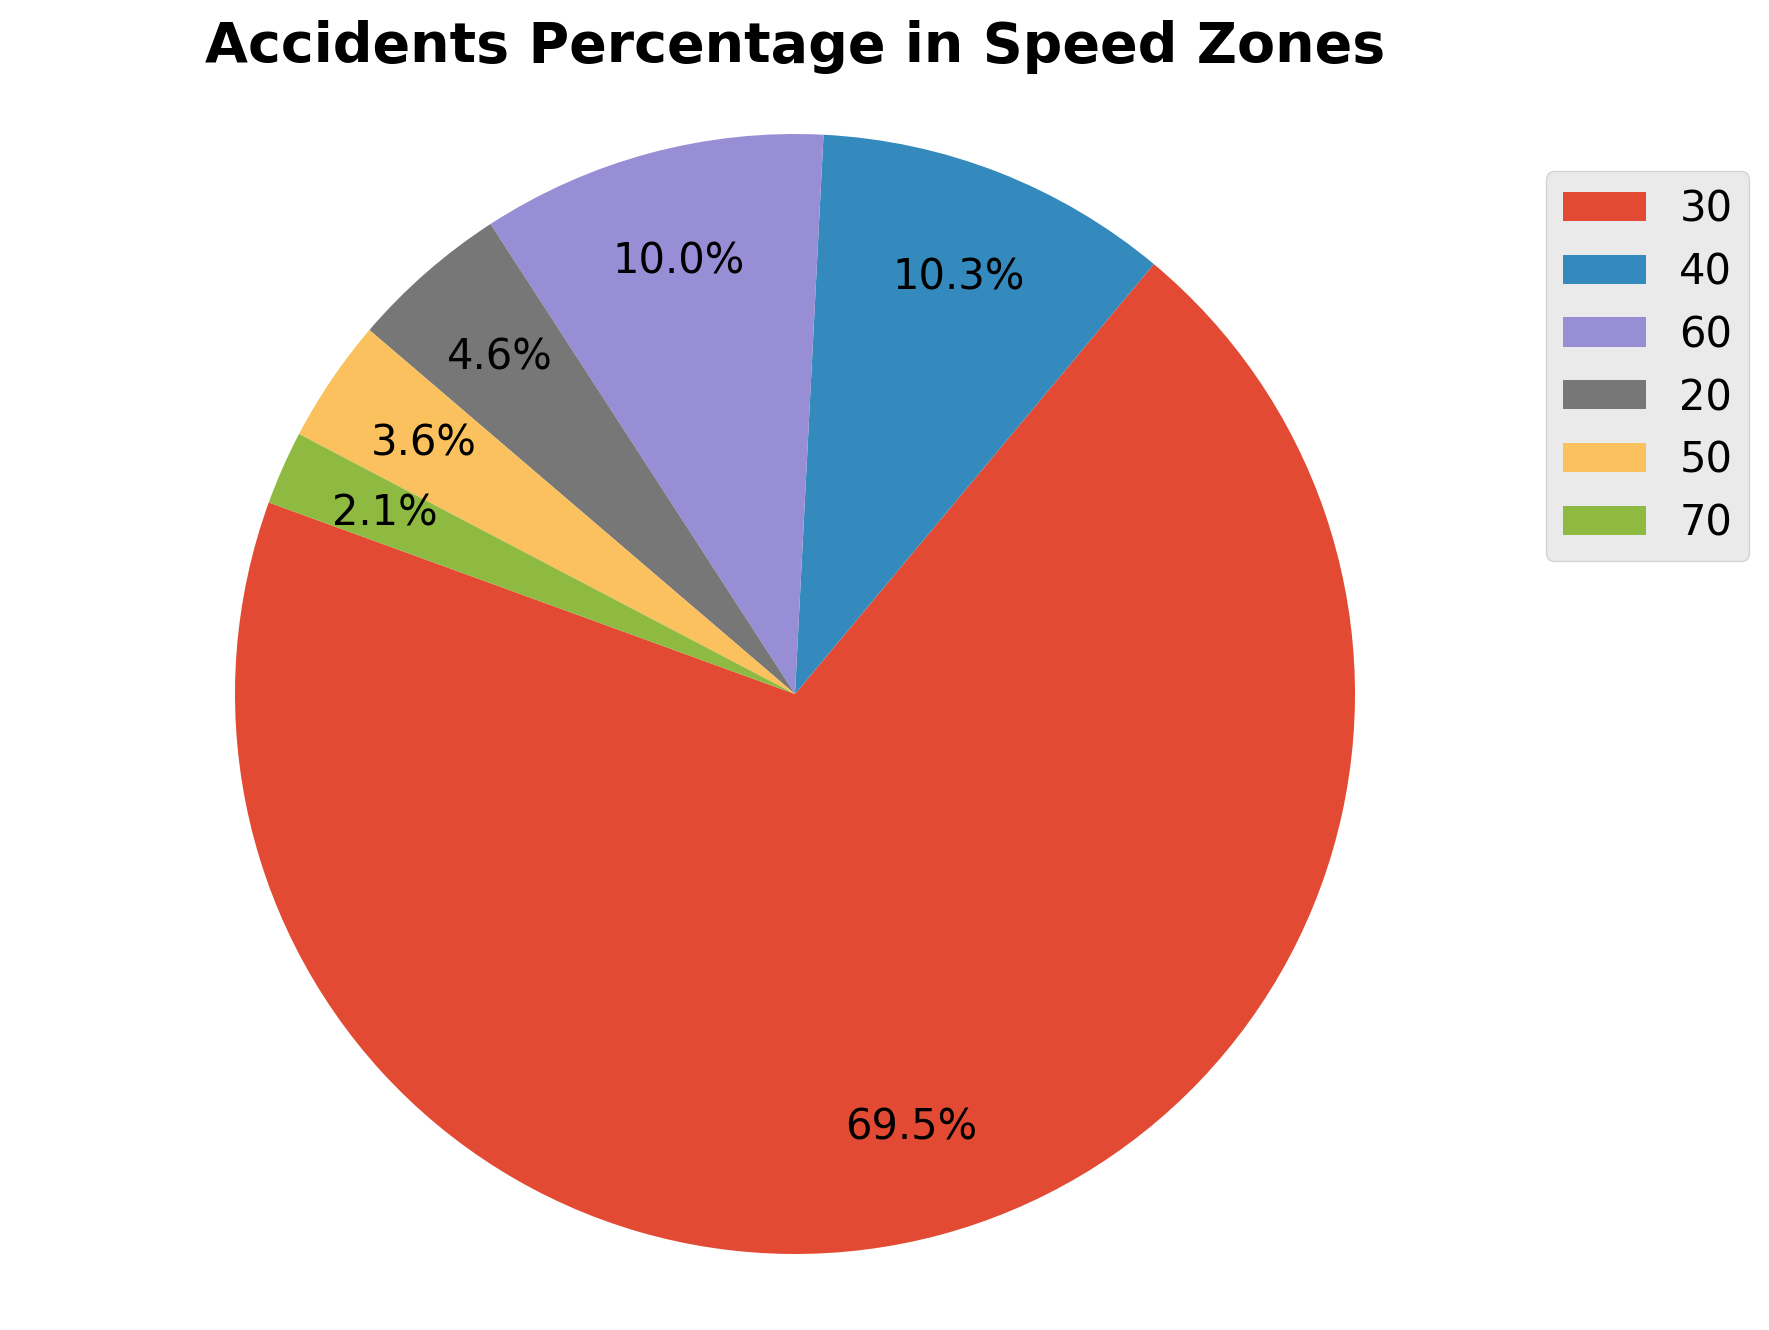

In [ ]:
speed_zone_accidents = accidents.loc[accidents['speed_limit'].isin([20, 30, 40, 50, 60, 70])]
speed = speed_zone_accidents['speed_limit'].value_counts()

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
plt.figure(figsize=(10,8))
plt.pie(
    speed.values,
    labels=None,
    autopct='%.1f%%',
    pctdistance=0.8,
    labeldistance=1.9,
    explode=explode,
    shadow=False,
    startangle=160,
    textprops={'fontsize': 15}
)

plt.axis('equal')
plt.legend(speed.index.astype(str), bbox_to_anchor=(1,0.7), loc="center right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)
plt.title("Accidents Percentage in Speed Zones", fontsize=20, weight="bold")
plt.show()


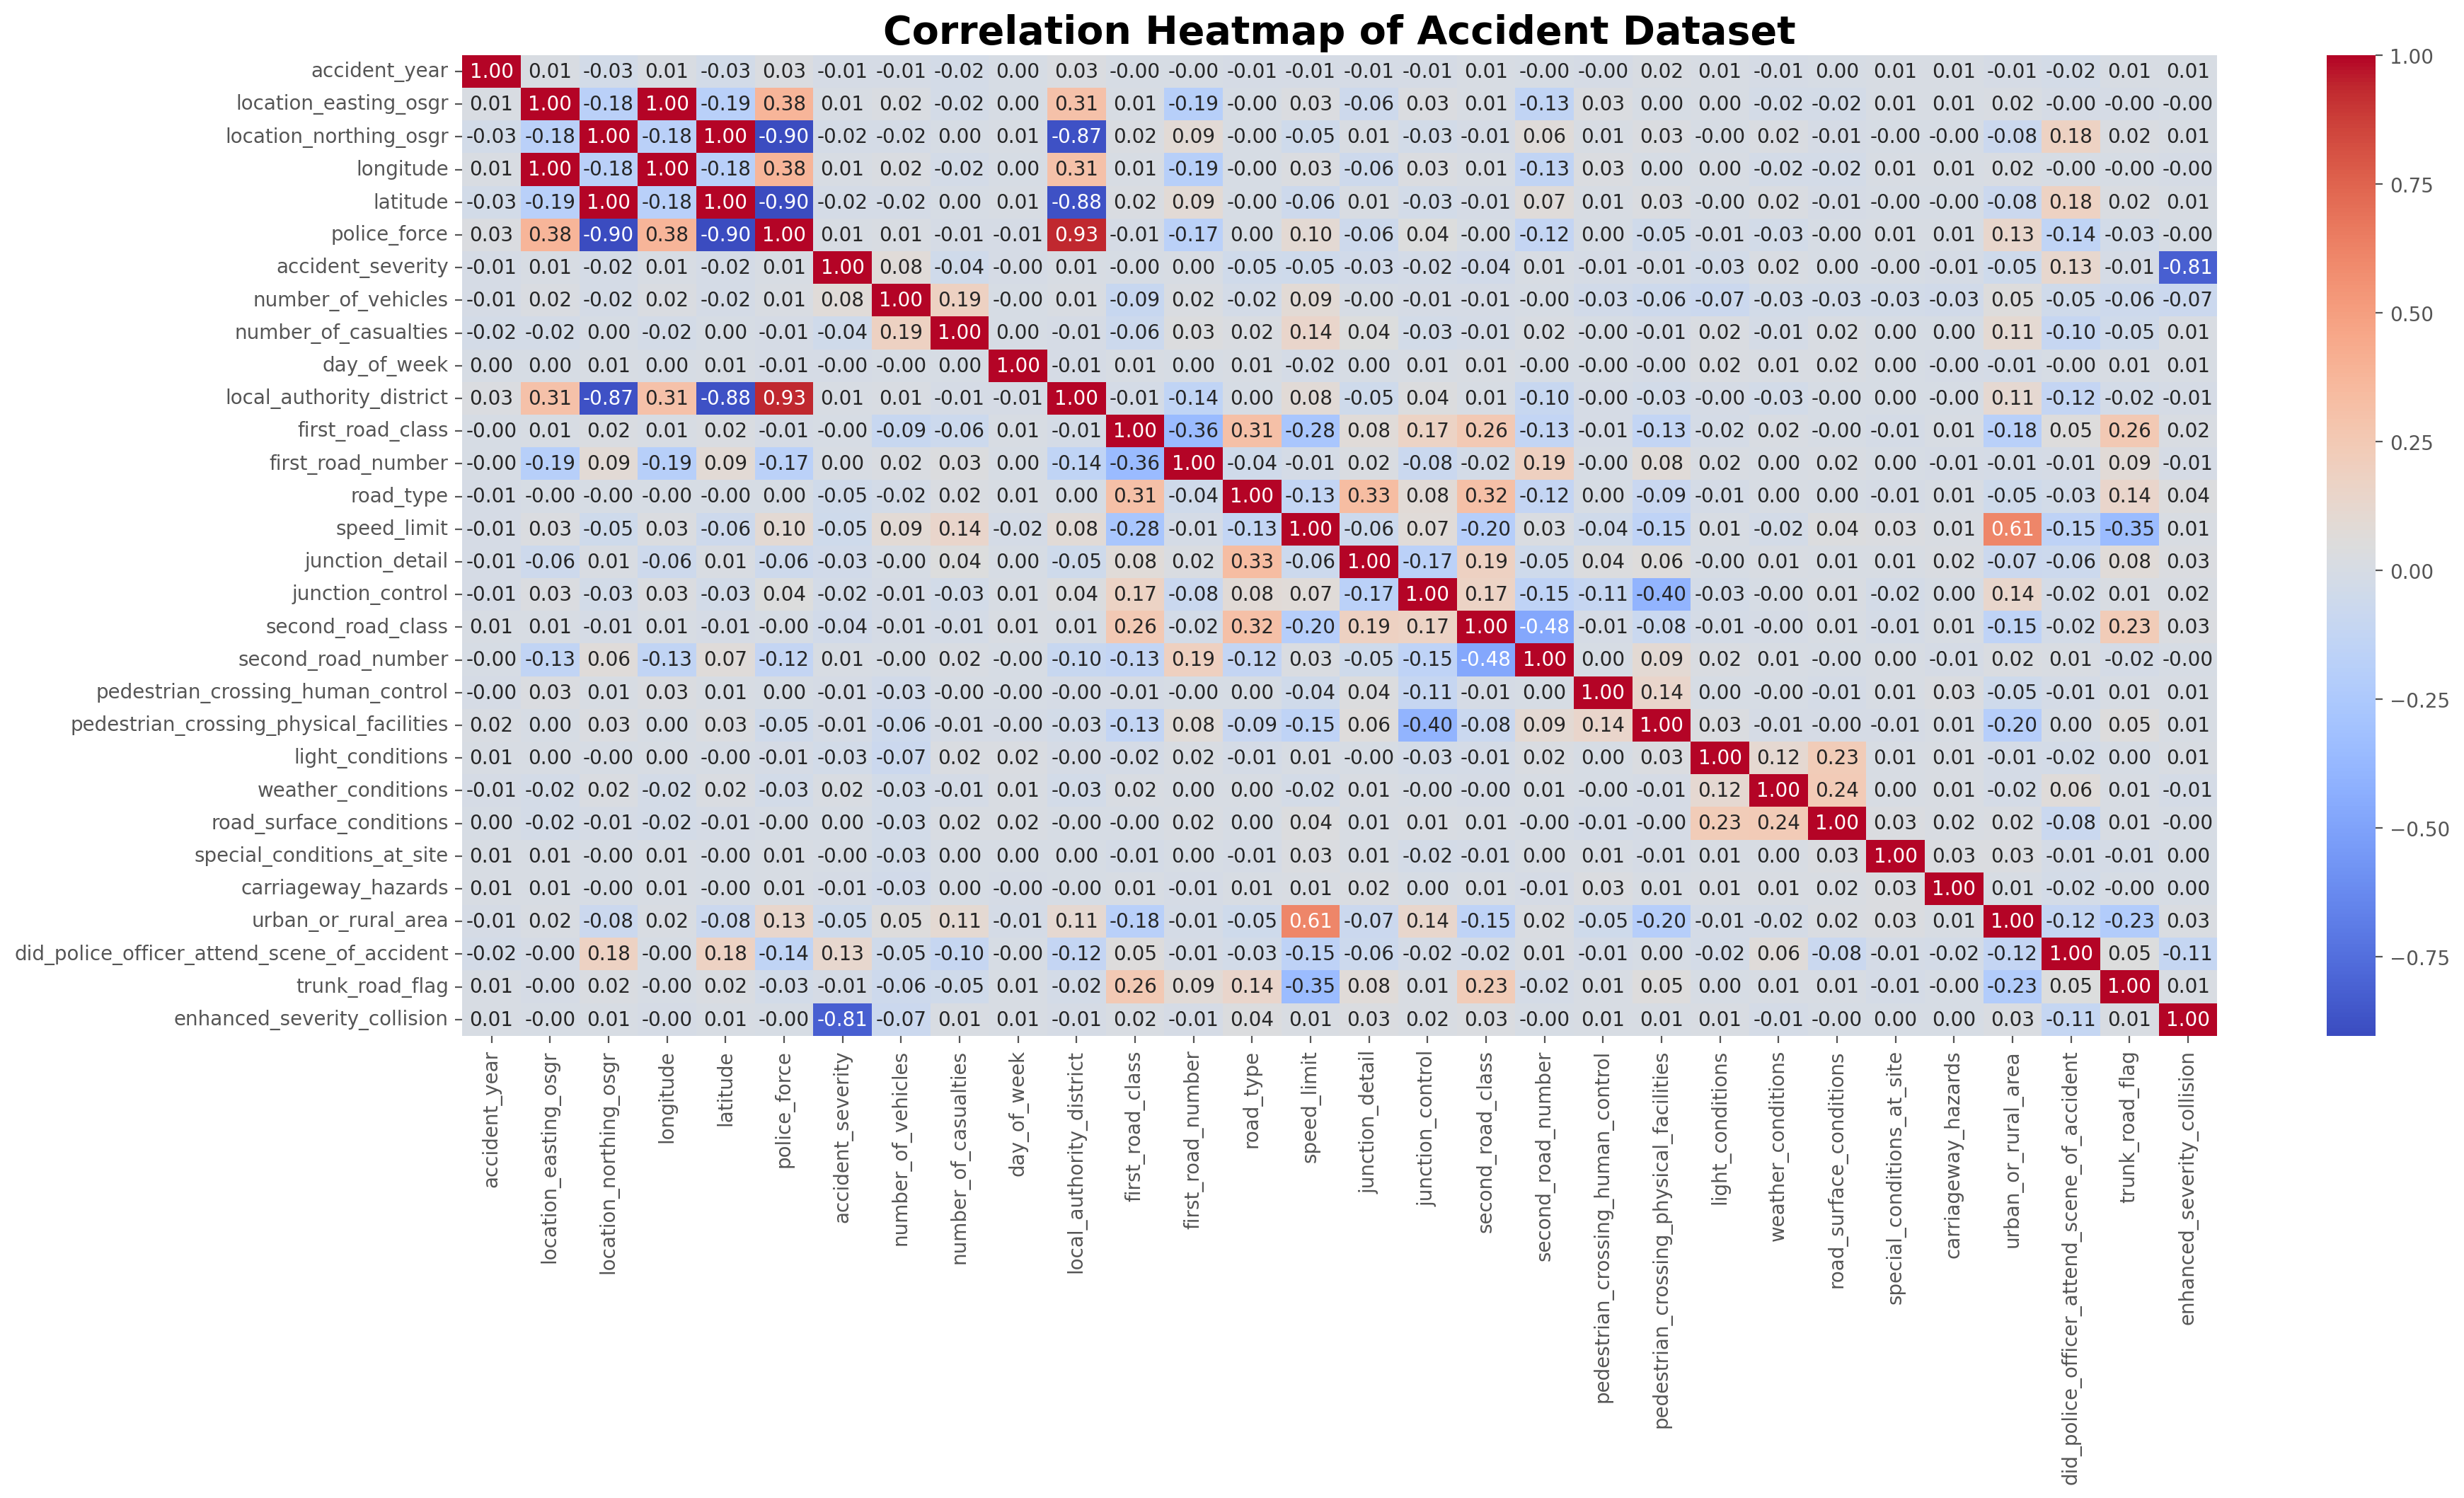

In [ ]:
# Compute correlation only for numeric columns
corr = accidents.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Accident Dataset", fontsize=20, weight="bold")
plt.show()


In [ ]:
# Filter accidents that happened in 2019
accidents_2019 = accidents[accidents["Date_time"].dt.year == 2019]

# Split accidents based on severity
accidents_2019_01 = accidents_2019[accidents_2019["accident_severity"] == 1]  # Fatal
accidents_2019_02 = accidents_2019[accidents_2019["accident_severity"] == 2]  # Serious
accidents_2019_03 = accidents_2019[accidents_2019["accident_severity"] == 3]  # Slight

print("2019 Accidents total:", len(accidents_2019))
print("Fatal (severity=1):", len(accidents_2019_01))
print("Serious (severity=2):", len(accidents_2019_02))
print("Slight (severity=3):", len(accidents_2019_03))



2019 Accidents total: 23129
Fatal (severity=1): 226
Serious (severity=2): 4960
Slight (severity=3): 17943


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

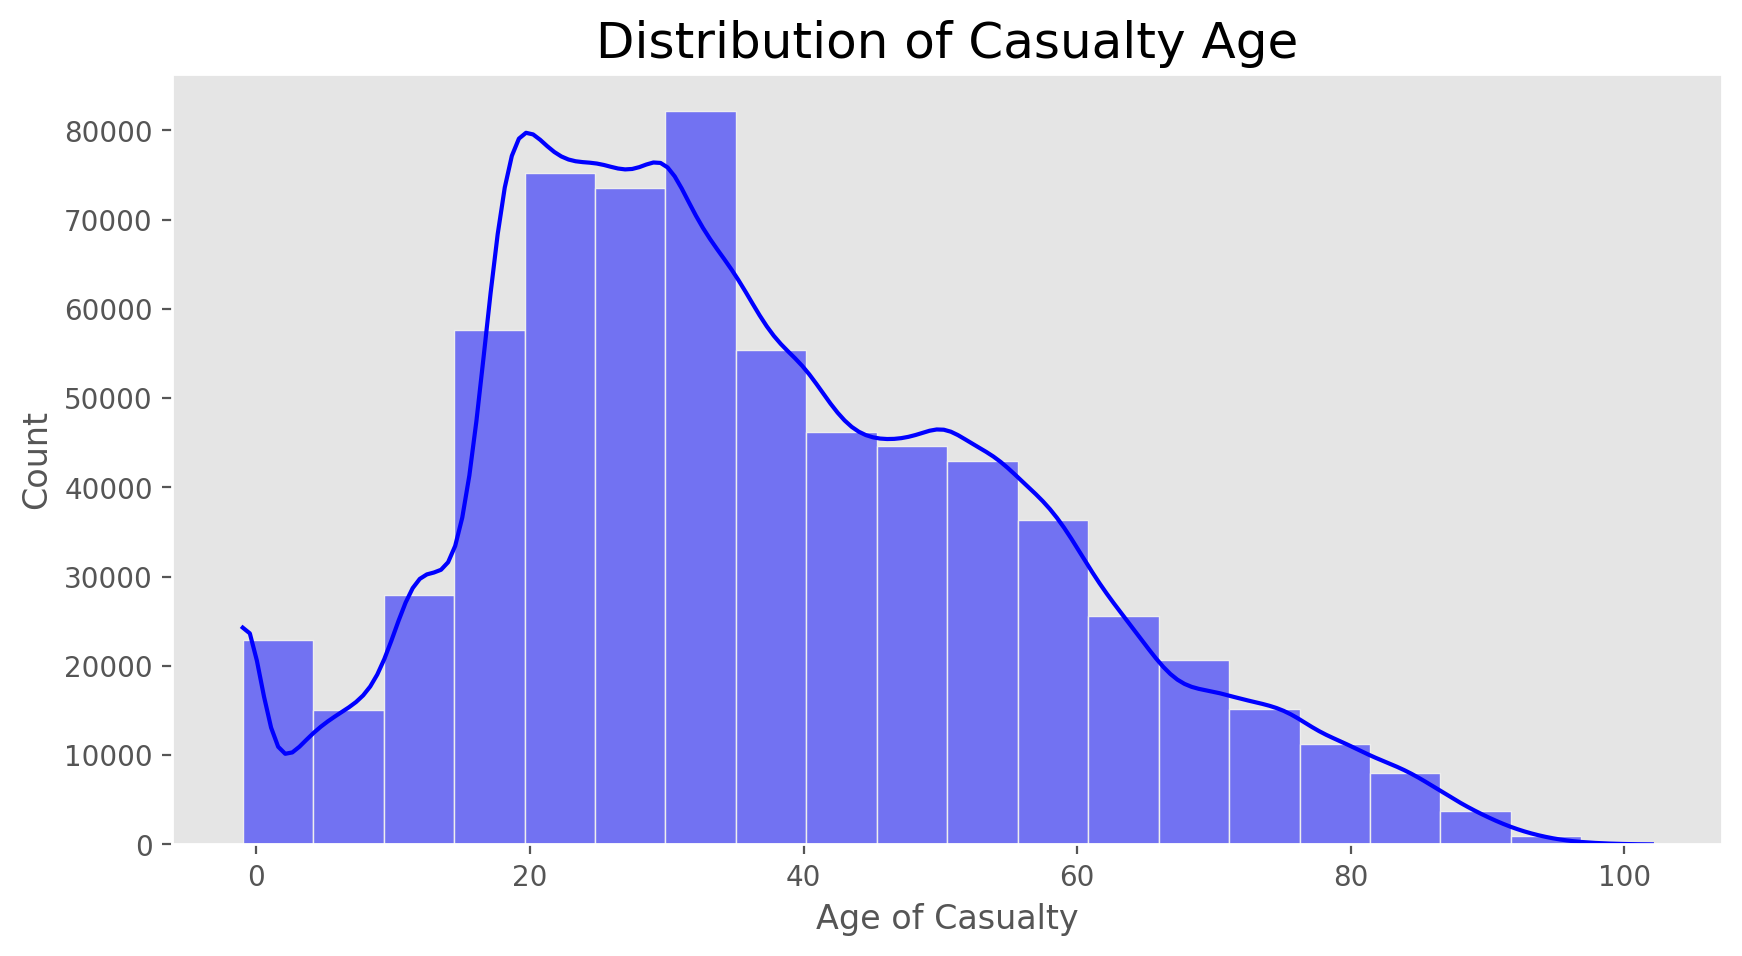

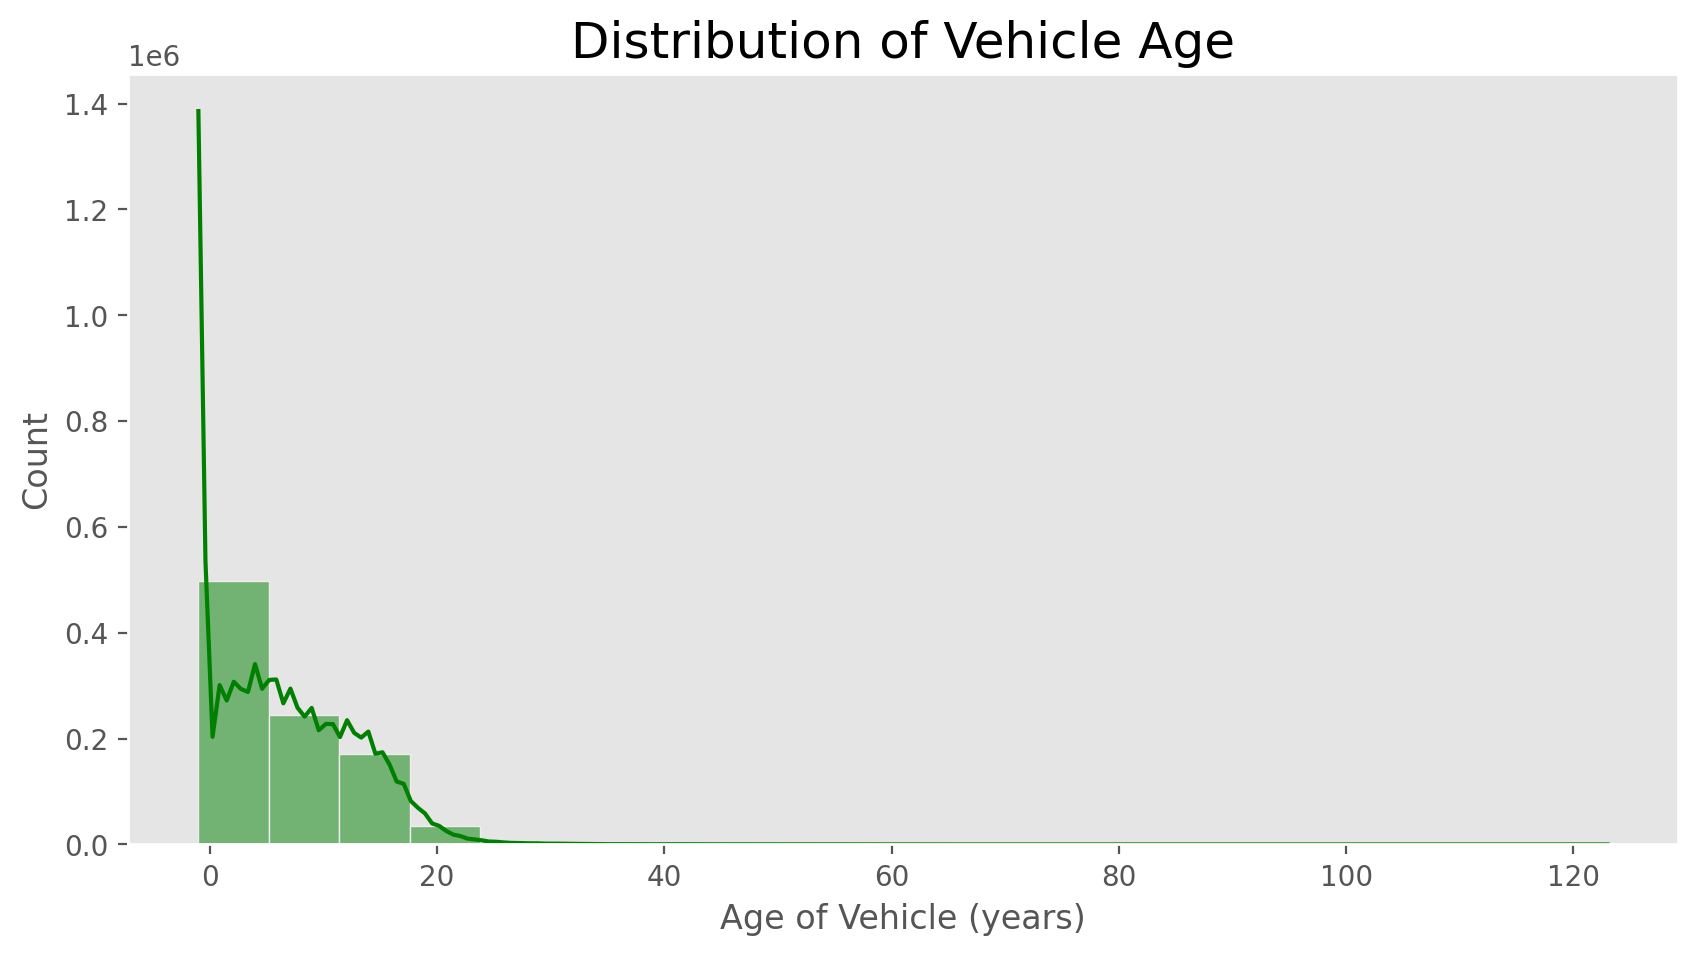

In [ ]:
# Age of Casualty (instead of Age_of_Driver)
plt.figure(figsize=(10,5))
sns.histplot(casualties['age_of_casualty'].dropna(), kde=True, color='blue', bins=20)
plt.title("Distribution of Casualty Age", fontsize=18)
plt.xlabel("Age of Casualty")
plt.ylabel("Count")
plt.grid(False)
plt.show()

# Age of Vehicle
plt.figure(figsize=(10,5))
sns.histplot(vehicles['age_of_vehicle'].dropna(), kde=True, color='green', bins=20)
plt.title("Distribution of Vehicle Age", fontsize=18)
plt.xlabel("Age of Vehicle (years)")
plt.ylabel("Count")
plt.grid(False)
plt.show()



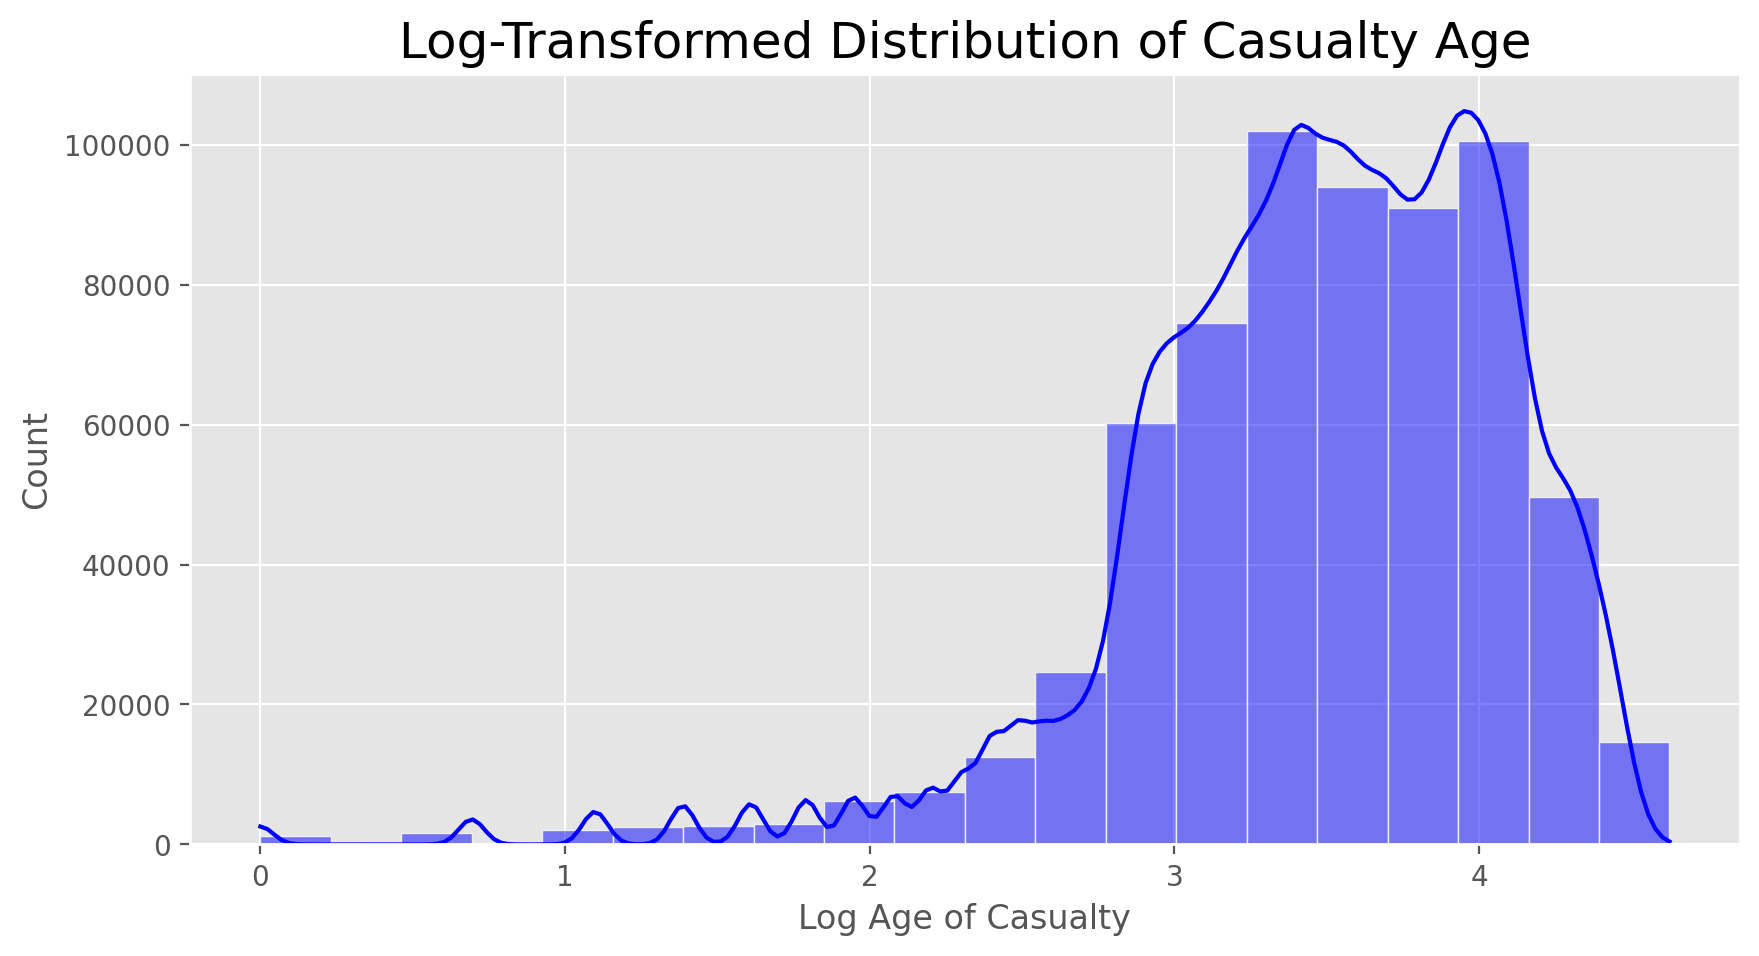

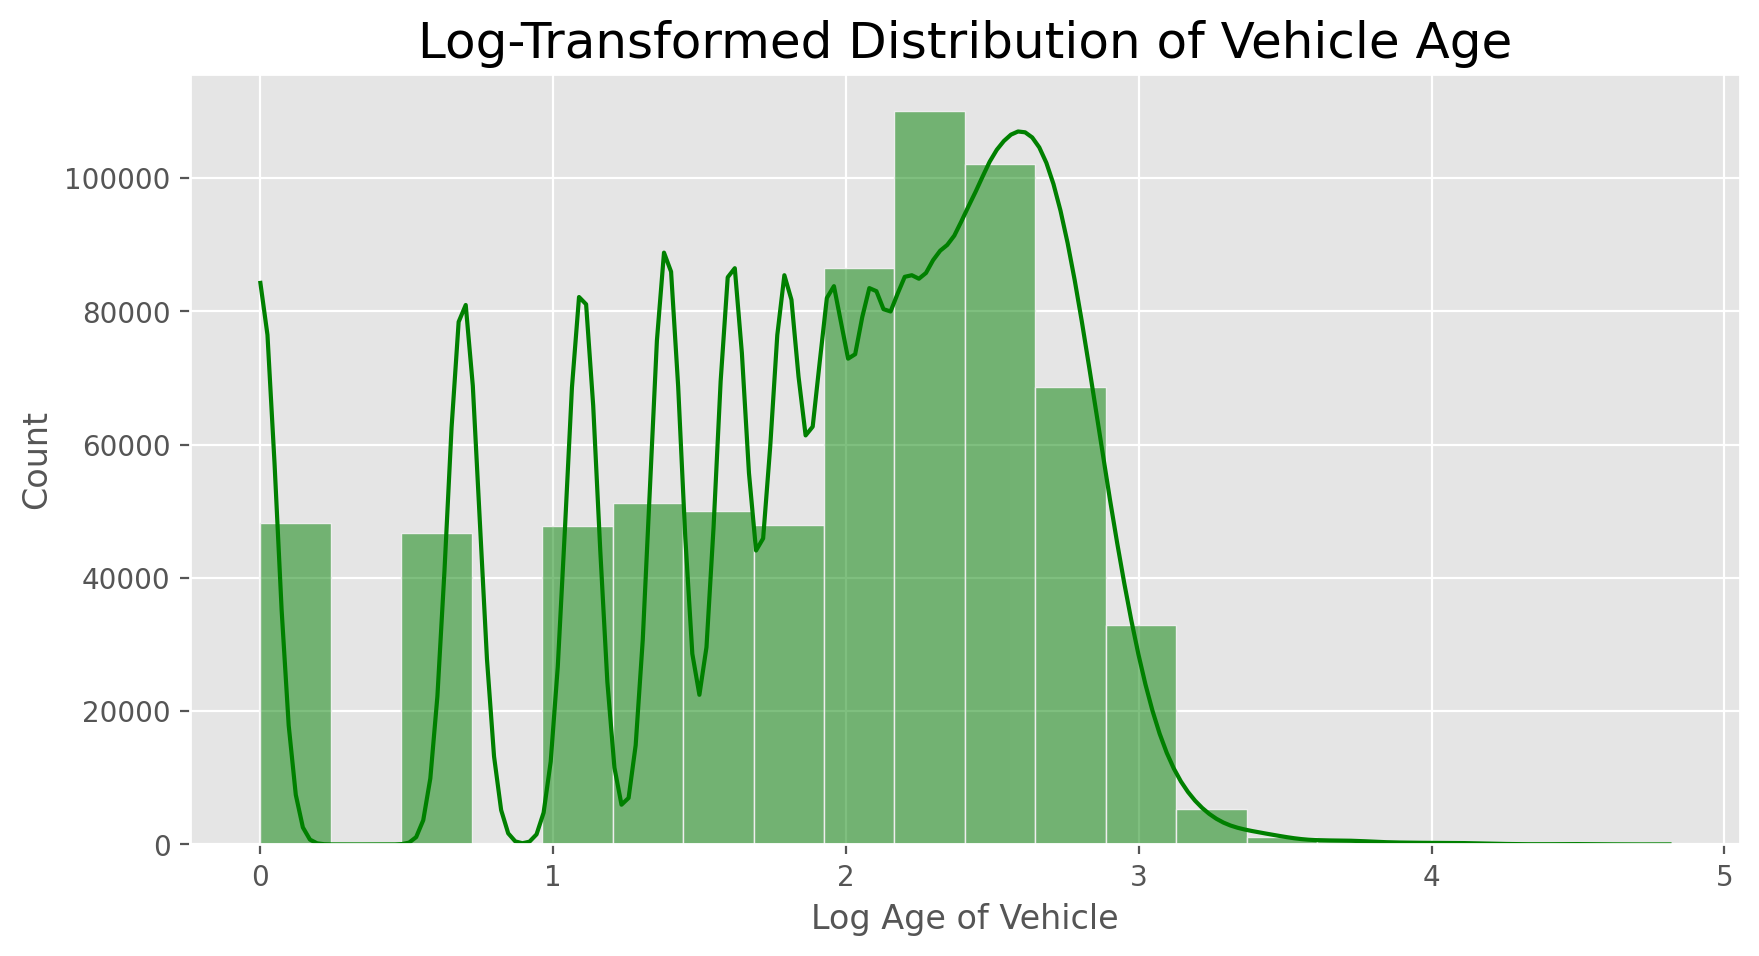

In [ ]:
# Log transform Age of Casualty (proxy for Driver Age)
casualties['log_age_of_casualty'] = np.log(casualties['age_of_casualty'].replace(0, np.nan))

plt.figure(figsize=(10,5))
sns.histplot(casualties['log_age_of_casualty'].dropna(), kde=True, color='blue', bins=20)
plt.title("Log-Transformed Distribution of Casualty Age", fontsize=18)
plt.xlabel("Log Age of Casualty")
plt.ylabel("Count")
plt.show()

# Log transform Age of Vehicle
vehicles['log_age_of_vehicle'] = np.log(vehicles['age_of_vehicle'].replace(0, np.nan))

plt.figure(figsize=(10,5))
sns.histplot(vehicles['log_age_of_vehicle'].dropna(), kde=True, color='green', bins=20)
plt.title("Log-Transformed Distribution of Vehicle Age", fontsize=18)
plt.xlabel("Log Age of Vehicle")
plt.ylabel("Count")
plt.show()


In [ ]:
print(vehicles.columns.tolist())

['accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type', 'lsoa_of_driver', 'escooter_flag', 'dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n', 'driver_distance_banding', 'log_age_of_vehicle']


In [ ]:
# Clean up the BOM issue in Vehicles
vehicles.rename(columns={'\ufeffaccident_index': 'accident_index'}, inplace=True)

# Now merge works
merged = pd.merge(accidents, vehicles, on="accident_index", how="inner")

# Select features
features = ['did_police_officer_attend_scene_of_accident',
            'age_of_driver',
            'vehicle_type',
            'age_of_vehicle',
            'engine_capacity_cc',
            'day_of_week',
            'weather_conditions',
            'road_surface_conditions',
            'light_conditions',
            'sex_of_driver',
            'speed_limit']

accident_ml = merged[features]

# Target
y = merged['accident_severity']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    accident_ml.values,
    y.values,
    test_size=0.20,
    random_state=99,
    shuffle=True,
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (52781, 11)
Test set shape: (13196, 11)


# **Training Models**

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=99)
decision_tree.fit(X_train, y_train)

# Predict
Y_pred = decision_tree.predict(X_test)

# Accuracy
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
print("Accuracy:", acc_decision_tree1, "%")

# Classification report
sk_report = classification_report(
    y_true=y_test,
    y_pred=Y_pred,
    digits=6
)
print(sk_report)

# Confusion Matrix
crosstab = pd.crosstab(y_test, Y_pred,
                       rownames=['Actual'],
                       colnames=['Predicted'],
                       margins=True)
print(crosstab)


Accuracy: 65.58 %
              precision    recall  f1-score   support

           1   0.015038  0.017094  0.016000       117
           2   0.238565  0.261544  0.249527      2772
           3   0.790802  0.769089  0.779794     10307

    accuracy                       0.655805     13196
   macro avg   0.348135  0.349242  0.348440     13196
weighted avg   0.667919  0.655805  0.661632     13196

Predicted    1     2      3    All
Actual                            
1            2    28     87    117
2           37   725   2010   2772
3           94  2286   7927  10307
All        133  3039  10024  13196


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Initialize KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5,   # You can tune this parameter
    weights='uniform'
)

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=6))
print("\nConfusion Matrix:\n", pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


KNN Accuracy: 74.74

Classification Report:
               precision    recall  f1-score   support

           1   0.125000  0.008547  0.016000       117
           2   0.294011  0.116883  0.167269      2772
           3   0.789178  0.925391  0.851873     10307

    accuracy                       0.747423     13196
   macro avg   0.402729  0.350274  0.345047     13196
weighted avg   0.679272  0.747423  0.700652     13196


Confusion Matrix:
 Predicted  1     2      3    All
Actual                          
1          1    13    103    117
2          3   324   2445   2772
3          4   765   9538  10307
All        8  1102  12086  13196


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=200, random_state=99)
random_forest.fit(X_train, y_train)

# Predict
Y_pred = random_forest.predict(X_test)

# Accuracy
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)
print("Accuracy:", acc_random_forest1, "%")

# Classification report
sk_report = classification_report(
    y_true=y_test,
    y_pred=Y_pred,
    digits=6
)
print(sk_report)

# Crosstab (confusion matrix style)
crosstab = pd.crosstab(y_test, Y_pred,
                       rownames=['Actual'],
                       colnames=['Predicted'],
                       margins=True)
print(crosstab)


Accuracy: 76.36 %
              precision    recall  f1-score   support

           1   0.142857  0.008547  0.016129       117
           2   0.352795  0.102453  0.158792      2772
           3   0.790617  0.949937  0.862985     10307

    accuracy                       0.763565     13196
   macro avg   0.428756  0.353646  0.345969     13196
weighted avg   0.692903  0.763565  0.707551     13196

Predicted  1    2      3    All
Actual                         
1          1    9    107    117
2          2  284   2486   2772
3          4  512   9791  10307
All        7  805  12384  13196


# **LogisticRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Encode categorical variables
accident_ml_encoded = pd.get_dummies(accident_ml, drop_first=True)

# Train/Test split again with encoded data
X_train, X_test, y_train, y_test = train_test_split(
    accident_ml_encoded.values,
    y.values,
    test_size=0.20,
    random_state=99
)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)   # increased iterations for convergence
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Report
sk_report = classification_report(
    y_true=y_test,
    y_pred=y_pred,
    digits=6
)
print("Accuracy:", round(accuracy_score(y_pred, y_test) * 100, 2))
print(sk_report)

# Crosstab
print(pd.crosstab(y_test, y_pred,
                  rownames=['Actual'],
                  colnames=['Predicted'],
                  margins=True))


Accuracy: 78.11
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       117
           2   0.000000  0.000000  0.000000      2772
           3   0.781070  1.000000  0.877080     10307

    accuracy                       0.781070     13196
   macro avg   0.260357  0.333333  0.292360     13196
weighted avg   0.610070  0.781070  0.685061     13196

Predicted      3    All
Actual                 
1            117    117
2           2772   2772
3          10307  10307
All        13196  13196


In [ ]:
# Install xgboost if not already installed
!pip install xgboost

# **XGBoost**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Example: assuming X_train, X_test, y_train, y_test are already defined
# Here, we simulate some data just for completeness
# Remove or replace this block with your actual data loading
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Remap target labels if needed (for example, if labels are 1,2,3 instead of 0,1,2)
# In this example, it's not necessary, but we'll keep it for your structure
y_train_adj = y_train  # or y_train - 1 if applicable
y_test_adj = y_test    # or y_test - 1 if applicable

# Train the XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(X_train, y_train_adj)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print(classification_report(y_test_adj, y_pred, digits=6))
print(pd.crosstab(y_test_adj, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


XGBoost Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30

Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **Randomized Search for Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=99, use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=99)
random_search.fit(X_train, y_train_adj)

print("Best params:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)


Best params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best accuracy: 0.9416666666666668


# **Voting Classifier Ensemble**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=99)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=99)

# Create ensemble (hard voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='hard'   # or 'soft' if you want probability averaging
)

voting_clf.fit(X_train, y_train_adj)   # remember we mapped severity to 0,1,2
y_pred = voting_clf.predict(X_test)

print("Ensemble Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print(classification_report(y_test_adj, y_pred, digits=6))


Ensemble Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30



# **RF+CNN**


In [ ]:
# --- Imports ---
import torch
import torch.nn as nn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# --- 1. Convert NumPy arrays to PyTorch tensors ---
# X_train, X_test: shape (n_samples, n_features)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # shape: (n_samples, 1, n_features)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long)

# --- 2. Define 1D CNN for feature extraction ---
class CNN1D(nn.Module):
    def __init__(self, input_features):
        super(CNN1D, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        return x

cnn = CNN1D(input_features=X_train.shape[1])

# --- 3. Extract features using CNN (no training, just for demo) ---
cnn.eval()
with torch.no_grad():
    X_train_features = cnn(X_train_tensor).numpy()
    X_test_features  = cnn(X_test_tensor).numpy()

print("CNN-extracted feature shapes:", X_train_features.shape, X_test_features.shape)

# --- 4. Train Random Forest on CNN features ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_features, y_train)

# --- 5. Predict and evaluate ---
y_pred = rf.predict(X_test_features)

print("RF + CNN Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred, digits=6))
print(pd.crosstab(
    y_test,
    y_pred,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))


CNN-extracted feature shapes: (120, 128) (30, 128)
RF + CNN Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30

Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


In [ ]:
!pip install catboost lightgbm

# **CatBoost**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Train CatBoost (simple)
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=8,
    verbose=0,
    random_state=99
)

cat.fit(X_train, y_train_adj)

# Predict
y_pred_cat = cat.predict(X_test)
y_pred_cat = y_pred_cat.ravel()  # <-- flatten to 1D

print("y_test_adj shape:", y_test_adj.shape)
print("y_pred_cat shape:", y_pred_cat.shape)

# Accuracy
print("CatBoost Accuracy:", round(accuracy_score(y_test_adj, y_pred_cat) * 100, 2))
print(classification_report(y_test_adj, y_pred_cat, digits=6))

# Confusion Matrix
print(pd.crosstab(
    y_test_adj,
    y_pred_cat,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))


y_test_adj shape: (30,)
y_pred_cat shape: (30,)
CatBoost Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30

Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **Stacking Classifier using Gradient Boosting Models as Base Learners and Logistic Regression as the Meta Learner**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Base models
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=8,
    verbose=0,
    random_state=99
)

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Meta learner
meta_lr = LogisticRegression(max_iter=1000)

# Stacking ensemble
stacking_model = StackingClassifier(
    estimators=[('cat', cat), ('lgb', lgb), ('xgb', xgb)],
    final_estimator=meta_lr,
    cv=5
)

# Train (remember accident_severity was remapped: 1,2,3 → 0,1,2)
stacking_model.fit(X_train, y_train_adj)

# Predict
y_pred = stacking_model.predict(X_test)

# Accuracy
print("Stacking Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))

# Classification Report
print(classification_report(y_test_adj, y_pred, digits=6))

# Confusion Matrix
print(pd.crosstab(y_test_adj, y_pred,
                  rownames=['Actual'],
                  colnames=['Predicted'],
                  margins=True))



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# **Deep forest - like Cascade**


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# --- 1. Function to create cascade layers ---
def deep_forest_cascade(X_train, y_train, X_test, max_layers=3):
    """
    Implements a Deep Forest-like cascade of ensembles.
    Each layer outputs predictions, which are concatenated to original features for the next layer.
    """
    X_train_layer = X_train.copy()
    X_test_layer = X_test.copy()

    for layer in range(max_layers):
        print(f"\n--- Training Layer {layer+1} ---")

        # Layer consists of multiple forests
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        et = ExtraTreesClassifier(n_estimators=100, random_state=42)
        gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

        # Train each forest
        rf.fit(X_train_layer, y_train)
        et.fit(X_train_layer, y_train)
        gb.fit(X_train_layer, y_train)

        # Get class probabilities for stacking
        rf_prob = rf.predict_proba(X_train_layer)
        et_prob = et.predict_proba(X_train_layer)
        gb_prob = gb.predict_proba(X_train_layer)

        X_train_layer = np.hstack([X_train_layer, rf_prob, et_prob, gb_prob])

        rf_prob_test = rf.predict_proba(X_test_layer)
        et_prob_test = et.predict_proba(X_test_layer)
        gb_prob_test = gb.predict_proba(X_test_layer)

        X_test_layer = np.hstack([X_test_layer, rf_prob_test, et_prob_test, gb_prob_test])

    # Final layer: train a strong Random Forest on the last layer features
    final_rf = RandomForestClassifier(n_estimators=200, random_state=42)
    final_rf.fit(X_train_layer, y_train)

    y_pred = final_rf.predict(X_test_layer)

    return y_pred

# --- 2. Train and predict ---
y_pred = deep_forest_cascade(X_train, y_train_adj, X_test, max_layers=3)

# --- 3. Evaluate ---
print("\nDeep Forest-like Cascade Accuracy:", round(accuracy_score(y_test_adj, y_pred)*100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))
print("\nConfusion Matrix:")
print(pd.crosstab(
    y_test_adj,
    y_pred,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))



--- Training Layer 1 ---

--- Training Layer 2 ---

--- Training Layer 3 ---

Deep Forest-like Cascade Accuracy: 93.33

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30


Confusion Matrix:
Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **GradientBoost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --- Initialize Gradient Boosting Classifier ---
gb_clf = GradientBoostingClassifier(
    n_estimators=500,        # number of boosting stages
    learning_rate=0.05,      # step size shrinkage
    max_depth=4,             # depth of each tree
    subsample=0.8,           # fraction of samples for fitting each tree (stochastic gradient boosting)
    random_state=42
)

# --- Train the model ---
gb_clf.fit(X_train, y_train_adj)

# --- Predict ---
y_pred = gb_clf.predict(X_test)

# --- Evaluate performance ---
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))

# --- Confusion Matrix ---
print("\nConfusion Matrix:")
print(pd.crosstab(
    y_test_adj,
    y_pred,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))


Gradient Boosting Accuracy: 93.33

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30


Confusion Matrix:
Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **Stacked ensemble model combining Random Forest, AdaBoost, and CatBoost with a Random Forest as the final estimator**

In [ ]:
# --- Imports ---
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --- 1. Define base estimators ---
rf_base = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
ada_base = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=42)
cat_base = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)

# --- 2. Define Stacking Ensemble ---
stack = StackingClassifier(
    estimators=[
        ('rf', rf_base),
        ('ada', ada_base),
        ('cat', cat_base)
    ],
    final_estimator=RandomForestClassifier(n_estimators=200, random_state=42),
    n_jobs=-1,
    passthrough=True  # Pass original features to final estimator
)

# --- 3. Train Stacking Ensemble ---
stack.fit(X_train, y_train_adj)

# --- 4. Predict ---
y_pred = stack.predict(X_test)

# --- 5. Evaluate ---
print("Stacked Ensemble Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))

# --- 6. Confusion Matrix ---
print("\nConfusion Matrix:")
print(pd.crosstab(
    y_test_adj,
    y_pred,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))


Stacked Ensemble Accuracy: 93.33

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30


Confusion Matrix:
Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **Stacking Ensemble Model with an SVM as the Meta Learner**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=99)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=99)),
    ('lr', LogisticRegression(max_iter=1000))
]

# Meta learner (could be Logistic Regression, SVM, etc.)
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=SVC(probability=True),   # meta-model
    cv=5
)

stacking_clf.fit(X_train, y_train_adj)
y_pred = stacking_clf.predict(X_test)

print("Stacking Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print(classification_report(y_test_adj, y_pred, digits=6))


Stacking Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30



# **Stacking Classifier with Multiple Base Models (CatBoost, LightGBM, XGBoost, KNN) and Logistic Regression as the Meta Learner**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# --------------------------
# Base models
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=8,
    verbose=0,
    random_state=99
)

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform'
)

# --------------------------
# Meta learner
meta_lr = LogisticRegression(max_iter=1000)

# --------------------------
# Stacking ensemble with KNN included
stacking_model = StackingClassifier(
    estimators=[('cat', cat), ('lgb', lgb), ('xgb', xgb), ('knn', knn)],
    final_estimator=meta_lr,
    cv=5
)

# --------------------------
# Train
stacking_model.fit(X_train, y_train_adj)

# --------------------------
# Predict
y_pred = stacking_model.predict(X_test)

# --------------------------
# Evaluate
print("Stacking Accuracy with KNN:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))
print("\nConfusion Matrix:\n", pd.crosstab(y_test_adj, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# **AdaBoost Classifier**

In [ ]:
# --- Imports ---
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --- 1. Initialize AdaBoost ---
# Default base estimator is DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(
    n_estimators=100,       # number of weak learners
    learning_rate=1.0,      # step size for boosting
    random_state=42
)

# --- 2. Train on training data ---
ada.fit(X_train, y_train_adj)

# --- 3. Predict on test data ---
y_pred = ada.predict(X_test)

# --- 4. Evaluate performance ---
print("AdaBoost Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print(classification_report(y_test_adj, y_pred, digits=6))

# --- 5. Confusion Matrix ---
print(pd.crosstab(
    y_test_adj,
    y_pred,
    rownames=['Actual'],
    colnames=['Predicted'],
    margins=True
))


AdaBoost Accuracy: 93.33
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30

Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


# **Stacking Classifier with Class Weights**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# --------------------------
# Compute class weights manually
classes = np.unique(y_train_adj)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_adj)
class_weights = dict(zip(classes, weights))

print("Computed class weights:", class_weights)

# --------------------------
# Initialize base models with computed class_weights where applicable

# CatBoost with class_weights
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=8,
    verbose=0,
    random_state=99,
    class_weights=class_weights
)

# LightGBM does not directly accept class_weights in the same way,
# but you could use scale_pos_weight if binary, or handle it differently if multi-class.
lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99
)

# XGBoost can use scale_pos_weight but ignoring for simplicity here
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Meta learner
meta_lr = LogisticRegression(max_iter=1000)

# --------------------------
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Create the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('cat', cat), ('lgb', lgb), ('xgb', xgb)],
    final_estimator=meta_lr,
    cv=5
)

# --------------------------
# Train the stacking model
stacking_model.fit(X_train_scaled, y_train_adj)

# --------------------------
# Make predictions
y_pred = stacking_model.predict(X_test_scaled)

# --------------------------
# Evaluate the model
print("Stacking Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))
print("\nConfusion Matrix:\n", pd.crosstab(y_test_adj, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# **LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

# Train LightGBM (simple)
lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=99
)

lgb.fit(X_train, y_train_adj)

# Predict
y_pred_lgb = lgb.predict(X_test)

# Accuracy
print("LightGBM Accuracy:", round(accuracy_score(y_test_adj, y_pred_lgb) * 100, 2))
print(classification_report(y_test_adj, y_pred_lgb, digits=6))

# Confusion Matrix
print(pd.crosstab(y_test_adj, y_pred_lgb,
                  rownames=['Actual'],
                  colnames=['Predicted'],
                  margins=True))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Info] Start training from score -1.149906
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

# **LogisticRegressionCV**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data before applying LogisticRegressionCV
lr = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(cv=3, random_state=0, multi_class='multinomial', max_iter=1000)
)

# Train the model
lr.fit(X_train, y_train_adj)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression CV Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test_adj, y_pred, digits=6))
print("\nConfusion Matrix:\n", pd.crosstab(y_test_adj, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


Logistic Regression CV Accuracy: 96.67

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   1.000000  0.916667  0.956522        12
           2   0.909091  1.000000  0.952381        10

    accuracy                       0.966667        30
   macro avg   0.969697  0.972222  0.969634        30
weighted avg   0.969697  0.966667  0.966736        30


Confusion Matrix:
 Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   0  10   10
All        8  11  11   30


# **Stacked Ensemble Model (RF + MLP → Logistic Regression)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Base learners
rf = RandomForestClassifier(n_estimators=200, random_state=99)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),
                    activation='relu',
                    solver='adam',
                    max_iter=300,
                    random_state=99)

# Stacking ensemble: RF + MLP → Logistic Regression
stacking_model = StackingClassifier(
    estimators=[('rf', rf), ('mlp', mlp)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Train
stacking_model.fit(X_train, y_train_adj)

# Predict
y_pred = stacking_model.predict(X_test)

# Accuracy
print("Stacking RF + MLP Accuracy:", round(accuracy_score(y_test_adj, y_pred) * 100, 2))
print(classification_report(y_test_adj, y_pred, digits=6))

# Confusion Matrix
print(pd.crosstab(y_test_adj, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


Stacking RF + MLP Accuracy: 96.67
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   1.000000  0.916667  0.956522        12
           2   0.909091  1.000000  0.952381        10

    accuracy                       0.966667        30
   macro avg   0.969697  0.972222  0.969634        30
weighted avg   0.969697  0.966667  0.966736        30

Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   0  10   10
All        8  11  11   30


## **Feature importance**

Random Forest Accuracy: 93.33

Classification Report:
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         8
           1   0.916667  0.916667  0.916667        12
           2   0.900000  0.900000  0.900000        10

    accuracy                       0.933333        30
   macro avg   0.938889  0.938889  0.938889        30
weighted avg   0.933333  0.933333  0.933333        30


Confusion Matrix:
 Predicted  0   1   2  All
Actual                   
0          8   0   0    8
1          0  11   1   12
2          0   1   9   10
All        8  12  10   30


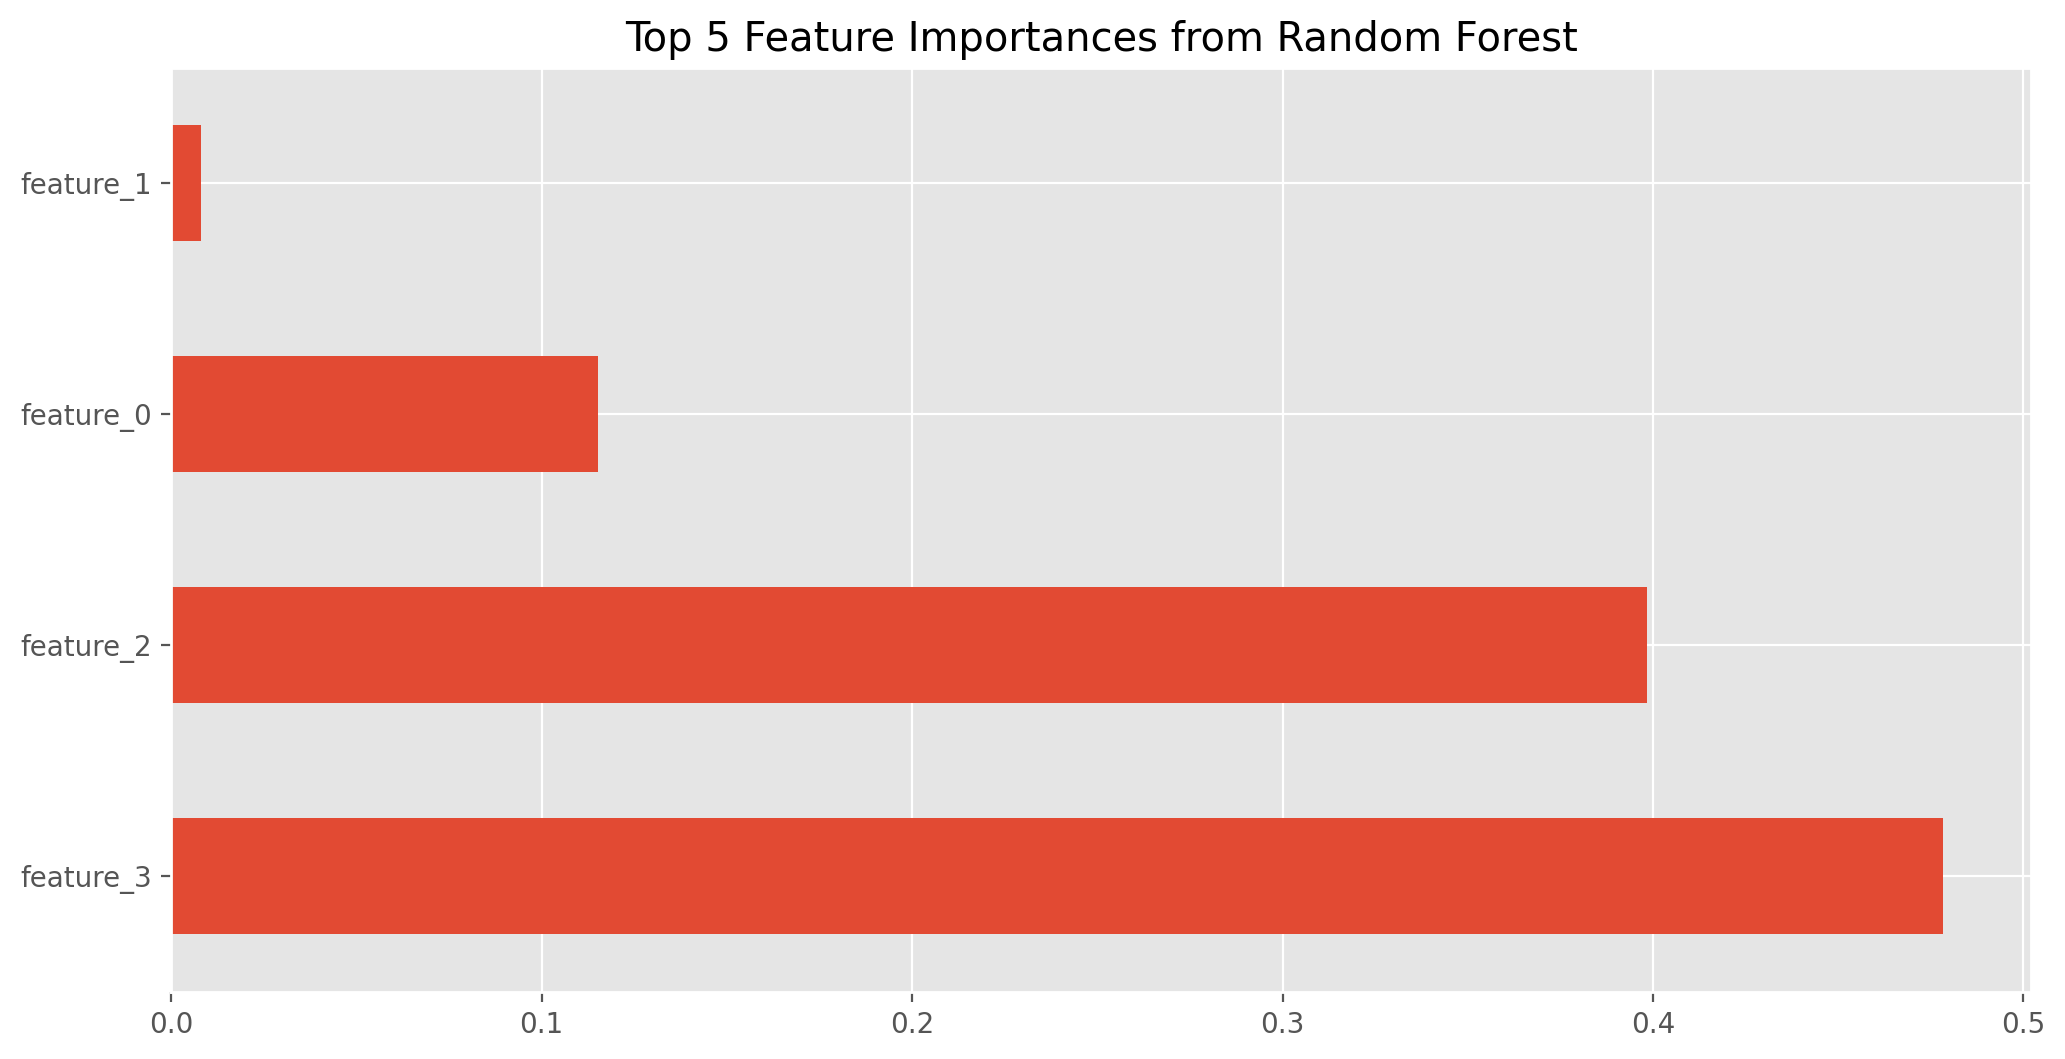

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# --- Example: defining the Random Forest and Grid Search ---
random_forest = RandomForestClassifier(random_state=99)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [5, 12]
}
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_adj)

# --- Predict ---
Y_pred = grid_search.predict(X_test)

# --- Accuracy ---
acc_random_forest = round(grid_search.score(X_test, y_test_adj) * 100, 2)
print("Random Forest Accuracy:", acc_random_forest)

# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test_adj, Y_pred, digits=6))

# --- Confusion Matrix ---
print("\nConfusion Matrix:\n", pd.crosstab(y_test_adj, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

# --- Feature Importances ---
plt.figure(figsize=(12,6))

# Check if X_train is a DataFrame or NumPy array
try:
    feature_names = X_train.columns
except AttributeError:
    # If it's a numpy array, define feature names manually
    feature_names = ['feature_' + str(i) for i in range(X_train.shape[1])]

feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=feature_names)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Feature Importances from Random Forest")
plt.show()
